# Fine-tuning a Model for Summarization Task

In this task, you will load, preprocess, and fine-tune a T5 model on a dataset of news articles for a summarization task. Follow the steps below carefully.

### Model and Dataset Information

For this task, you will be working with the following:

- **Model Checkpoint**: Use the pre-trained model checkpoint `yalsaffar/mt5-small-Arabic-Summarization` if you face any problem you can use `google-t5/t5-small` but the first one is the correct one for both the model and tokenizer.
- **Dataset**: You will be using the `CUTD/arabic_dialogue_df` dataset. Ensure to load and preprocess the dataset correctly for training and evaluation.

**Note:**
- Any additional steps or methods you include that improve or enhance the results will be rewarded with bonus points if they are justified.
- The steps outlined here are suggestions. You are free to implement alternative methods or approaches to achieve the task, as long as you explain the reasoning and the process at the bottom of the notebook.
- You can use either TensorFlow or PyTorch for this task. If you prefer TensorFlow, feel free to use it when working with Hugging Face Transformers.
- The number of data samples you choose to work with is flexible. However, if you select a very low number of samples and the training time is too short, this could affect the evaluation of your work.

## Step 1: Load the Dataset

Load the dataset and split it into training and test sets. Use 20% of the data for testing.

In [114]:
!pip install datasets

In [115]:
!pip install transformers

## Step 2: Load the Pretrained Tokenizer

Initialize a tokenizer from the gevin model checkpoint.

In [116]:
dataset = 'CUTD/arabic_dialogue_df'

In [117]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

from datasets import load_dataset
import pandas as pd

## Step 3: Preprocess the Dataset

Define a preprocessing function that adds a prefix ("summarize:") to each input if needed and tokenizes the text for the model. The labels will be the tokenized summaries.

In [151]:
data = load_dataset(dataset , split ='train[:1000]')

In [119]:
# Load model directly

tokenizer = AutoTokenizer.from_pretrained("google-t5/t5-small")
model = AutoModelForSeq2SeqLM.from_pretrained("google-t5/t5-small")

In [152]:
data

Dataset({
    features: ['Unnamed: 0', 'dialogue', 'summary'],
    num_rows: 1000
})

In [153]:
data = data.train_test_split(test_size=0.2)

In [154]:
data['train']

Dataset({
    features: ['Unnamed: 0', 'dialogue', 'summary'],
    num_rows: 800
})

In [155]:
data['test']

Dataset({
    features: ['Unnamed: 0', 'dialogue', 'summary'],
    num_rows: 200
})

In [156]:
data.set_format('pandas')
df = data['train'][:]
df.head()

,Unnamed: 0,dialogue,summary
0,131,الشخص 1: ماذا تريد لتناول الإفطار؟\n الشخص 2:...,الشخص 1 والشخص 2 يتحدثان عما يجب رؤيته اليوم.س...
1,743,الشخص 1: آسف!اعذرني!تلقيت رسالتك.\n الشخص 2: ...,لقد دهش الشخص 2 للحصول على رسالة تايلور التي ي...
2,281,إيلا: مرحبا هناك!كيف؟لم أسمع منك على مر العصور...,إيلا لديها علة في المعدة سيئة ، هي في ألم.يقتر...
3,790,لوكاس سالي: يرجى العثور على الدعوة الرسمية الم...,تمت دعوة كاثرين دوم من قبل لوكاس سالي لإجراء م...
4,293,الشخص 1: واو ، هناك الكثير من الفوانيس لتقديره...,الشخص 1 والشخص 2 يقدران الفوانيس.يسأل الشخص 1 ...


In [157]:
df = data['train'][:]
df_test = data['test'][:]

In [158]:
df.head()

,Unnamed: 0,dialogue,summary
0,131,الشخص 1: ماذا تريد لتناول الإفطار؟\n الشخص 2:...,الشخص 1 والشخص 2 يتحدثان عما يجب رؤيته اليوم.س...
1,743,الشخص 1: آسف!اعذرني!تلقيت رسالتك.\n الشخص 2: ...,لقد دهش الشخص 2 للحصول على رسالة تايلور التي ي...
2,281,إيلا: مرحبا هناك!كيف؟لم أسمع منك على مر العصور...,إيلا لديها علة في المعدة سيئة ، هي في ألم.يقتر...
3,790,لوكاس سالي: يرجى العثور على الدعوة الرسمية الم...,تمت دعوة كاثرين دوم من قبل لوكاس سالي لإجراء م...
4,293,الشخص 1: واو ، هناك الكثير من الفوانيس لتقديره...,الشخص 1 والشخص 2 يقدران الفوانيس.يسأل الشخص 1 ...


In [159]:
df.shape

(800, 3)

In [160]:
df['summary_length'] = df['summary'].str.len()
df['dialogue_length'] = df['dialogue'].str.len()

In [161]:
df.head()

,Unnamed: 0,dialogue,summary,summary_length,dialogue_length
0,131,الشخص 1: ماذا تريد لتناول الإفطار؟\n الشخص 2:...,الشخص 1 والشخص 2 يتحدثان عما يجب رؤيته اليوم.س...,97,731
1,743,الشخص 1: آسف!اعذرني!تلقيت رسالتك.\n الشخص 2: ...,لقد دهش الشخص 2 للحصول على رسالة تايلور التي ي...,144,359
2,281,إيلا: مرحبا هناك!كيف؟لم أسمع منك على مر العصور...,إيلا لديها علة في المعدة سيئة ، هي في ألم.يقتر...,167,1589
3,790,لوكاس سالي: يرجى العثور على الدعوة الرسمية الم...,تمت دعوة كاثرين دوم من قبل لوكاس سالي لإجراء م...,110,344
4,293,الشخص 1: واو ، هناك الكثير من الفوانيس لتقديره...,الشخص 1 والشخص 2 يقدران الفوانيس.يسأل الشخص 1 ...,108,950


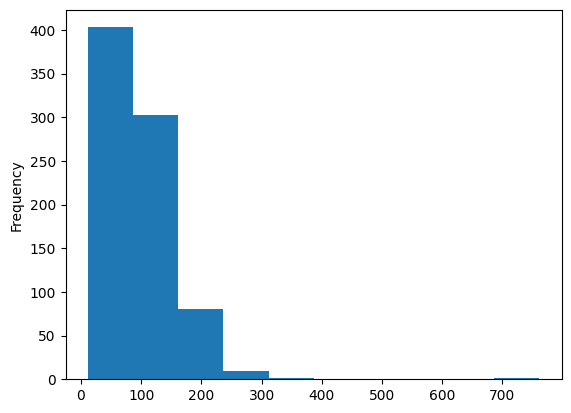

In [162]:
df['summary_length'].plot(kind = 'hist');

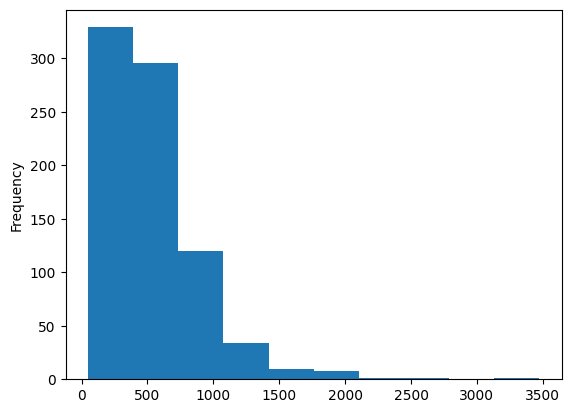

In [163]:
df['dialogue_length'].plot(kind = 'hist');

In [164]:
df.sample(5)

,Unnamed: 0,dialogue,summary,summary_length,dialogue_length
207,918,جيمي: نحن في شارع elm ، أين الآن؟\n تينا: انتظ...,جيمي في انتظار تينا في شارع الدردار.سوف يجتمعو...,64,205
19,907,الشخص 1: اليوم ، لقد دعا ضيفًا خاصًا ، البروفي...,البروفيسور.يقدم يانغ بعض النصائح حول الجوانب ا...,324,2053
727,307,الشخص 1: الرجاء مساعدة نفسك في أطباقك.أتمنى أن...,الشخص 1 يسأل الشخص 2 من تجربة الوصفة الخاصة لل...,78,256
525,445,الشخص 1: حسنًا.أريد أن أعيد الجميع إلى هذا الم...,سيبدأ الشخص 1 والشخص 2 اجتماعًا تحضيرًا في الس...,80,372
496,59,ناتالي: <file_photo>\n ناتالي: في التقدم\n كري...,أرسلت ناتالي صورة لكريستين ودانا.أنها تكمل على...,106,523


In [165]:
!pip install pyarabic

In [166]:
import re
from pyarabic.araby import strip_tashkeel , strip_harakat , strip_tatweel , normalize_hamza

In [167]:
!pip install emoji

In [168]:
import emoji

In [169]:
numbers = r'[\d+]'
punct = r'[^\w\s]'
pattern_n =r'[^[[\w][\n]'
pattern_eng = r'([A-Za-z])\w+'
re_patterns = '|'.join([numbers,punct])

In [170]:
def clean_data(text):
  text = re.sub(numbers , '' , text)
  text = re.sub(pattern_n , ' ' , text)
  text = re.sub(pattern_eng , '' , text)
  text = re.sub(punct , '' , text)
  text=re.sub(re_patterns,'',text)
  text = strip_tashkeel(text)
  text = normalize_hamza(text)


  return text

In [171]:
df['summary'] = df['summary'].apply(clean_data)
df['dialogue'] = df['dialogue'].apply(clean_data)


In [172]:
df.head()

,Unnamed: 0,dialogue,summary,summary_length,dialogue_length
0,131,الشخص ماذا تريد لتناول الءفطار الشخص حسنا ...,الشخص والشخص يتحدثان عما يجب رءيته اليومسوف ...,97,731
1,743,الشخص ءءسفاعذرنيتلقيت رسالتك الشخص تايلورت...,لقد دهش الشخص للحصول على رسالة تايلور التي يع...,144,359
2,281,ءيلا مرحبا هناككيفلم ءسمع منك على مر العصور ف...,ءيلا لديها علة في المعدة سيءة هي في ءلميقترح ...,167,1589
3,790,لوكاس سالي يرجى العثور على الدعوة الرسمية المر...,تمت دعوة كاثرين دوم من قبل لوكاس سالي لءجراء م...,110,344
4,293,الشخص واو هناك الكثير من الفوانيس لتقديرهاال...,الشخص والشخص يقدران الفوانيسيسءل الشخص عن م...,108,950


In [173]:
df_test['summary'] = df_test['summary'].apply(clean_data)
df_test['dialogue'] = df_test['dialogue'].apply(clean_data)

In [174]:
df_test.head()

,Unnamed: 0,dialogue,summary
0,340,الشخص هل هناك ءي خطء الشخص ءنا قلق بشءن اب...,يقترح الشخص الشخص السماح للطفل باتخاذ قرار خ...
1,887,الشخص لماذا لا نحصل على بعض القمصان يا حبيبي ...,يريد الشخص الحصول على بعض القمصان للشخص وال...
2,635,ساندرا اللعنة هذه العاهرة سخيفءنا ءكرهها كثيرا...,كان ساندرا حجة مع رءيسهاوجدت عرض عمل وهي تفكر ...
3,101,الشخص هل يمكنني استعارة خمسة دولارات الشخص ...,الشخص يريد اقتراض المال من الشخص الشخص يوافق...
4,765,جودي لنفعل شيءا مجنونا ليام مثل تامار بونجي ...,تريد جودي ءن تفعل شيءا مجنوناليام وتامار تبادل...


In [175]:
df['summary']

,summary
0,الشخص والشخص يتحدثان عما يجب رءيته اليومسوف ...
1,لقد دهش الشخص للحصول على رسالة تايلور التي يع...
2,ءيلا لديها علة في المعدة سيءة هي في ءلميقترح ...
3,تمت دعوة كاثرين دوم من قبل لوكاس سالي لءجراء م...
4,الشخص والشخص يقدران الفوانيسيسءل الشخص عن م...
...,...
795,يقترح الشخص الذهاب ءلى منزل جون لكن الشخص ال...
796,قادم فيليكس ءلى برلين في الحادي والعشرين ويبقى...
797,ءءنا ولونا ستسوق اليوم
798,الشخص يريد الانسحاب من شهادة ءيداع الشخص الشخ...


In [176]:
def preprocess_function(examples):
    inputs = ["summarize: " + doc for doc in examples['dialogue']]
    model_inputs = tokenizer(inputs, max_length=512, truncation=True,padding=True)

#Tokenize the labels
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(examples['summary'], max_length=150, truncation=True,padding=True)

    model_inputs['labels'] = labels['input_ids']
    return model_inputs

In [177]:
from datasets import DatasetDict , Dataset
df_train = Dataset.from_pandas(pd.DataFrame(df,columns=df.columns))
df_test = Dataset.from_pandas(pd.DataFrame(df_test,columns=df_test.columns))


## Step 4: Define the Data Collator

Use a data collator designed for sequence-to-sequence models, which dynamically pads inputs and labels.

In [178]:
tokin_data_train=df_train.map(preprocess_function,batched=True)
tokin_data_test=df_test.map(preprocess_function,batched=True)

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

In [179]:
from transformers import DataCollatorForSeq2Seq
import tensorflow as tf

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model, return_tensors="tf")

## Step 5: Load the Pretrained Model

Load the model for sequence-to-sequence tasks (summarization).

In [180]:
from transformers import TFT5ForConditionalGeneration
model = TFT5ForConditionalGeneration.from_pretrained('google-t5/t5-small')

All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


## Step 6: Define Training Arguments

In [181]:
tokin_data_train

Dataset({
    features: ['Unnamed: 0', 'dialogue', 'summary', 'summary_length', 'dialogue_length', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 800
})

Set up the training configuration with parameters like learning rate, batch size, and number of epochs.

In [182]:
tf_train_set = tokin_data_train.to_tf_dataset(columns=['input_ids','attention_mask','labels'],
    label_cols=['labels'],
    #tokenizer=tokin_data_train,
    shuffle=True,
    batch_size=8,
    collate_fn=data_collator,
)
tf_test_set = tokin_data_test.to_tf_dataset(columns=['input_ids','attention_mask','labels'],
    label_cols=['labels'],
    #tokenizer=tokin_data_train,
    shuffle=False,
    batch_size=8,
    collate_fn=data_collator,
)

/usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:403: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


## Step 7: Initialize the Trainer

Use the `Seq2SeqTrainer` class to train the model.

## Step 8: Fine-tune the Model

Train the model using the specified arguments and dataset.

In [183]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss,metrics=['accuracy'])

In [184]:
model.fit(tf_train_set, validation_data=tf_test_set, epochs=1)


100/100 [==============================] - 96s 503ms/step - loss: 0.2067 - accuracy: 0.9779 - val_loss: 0.0411 - val_accuracy: 0.9873


## Step 9: Inference

Once the model is trained, perform inference on a sample text to generate a summary. Use the tokenizer to process the text, and then feed it into the model to get the generated summary.

In [185]:
def generate_summary(text):
    input_ids = tokenizer("summarize: " + text, return_tensors="tf").input_ids
    outputs = model.generate(input_ids)
    summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return summary
sample_text = """
علم البيانات (بالإنكليزية: Data science) علم يغلب عليه تداخل الاختصاصات والذي يقوم على استخدام الأساليب العلمية، والمعالجات والخوارزميات والنظم لاستخراج المعرفة والأفكار من البيانات بشكليها، سواء مُهيكلة، أو غير مهيكلة، بشكل مشابه للتنقيب في البيانات. كما يعتمد علم البيانات على تقنيات تعلم الآلة والذكاء الصناعي وبرامج معالجة البيانات الضخمة. يُسمى الخبير بها عالم بيانات (بالإنكليزية: Data scientist).

ويُعرف علم البيانات بأنه «مفهوم قائم على توحيد الإحصاء، وتحليل البيانات وتعلم الآلة والوسائل المرتبطة بهم من أجل فهم وتحليل ظاهرة فعلية باستخدام البيانات».

وهو يقوم بتوظيف نظريات وأساليب مستمدة من حقول معرفية متعددة في سياق الرياضيات والإحصاء وعلم المعلومات وعلوم الحاسب."""
print(generate_summary(sample_text))

/usr/local/lib/python3.10/dist-packages/transformers/generation/tf_utils.py:837: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length.  recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


('/content/group1model/tokenizer_config.json',
 '/content/group1model/special_tokens_map.json',
 '/content/group1model/spiece.model',
 '/content/group1model/added_tokens.json',
 '/content/group1model/tokenizer.json')

In [189]:
sample_text = """
علم البيانات (بالإنكليزية: Data science) علم يغلب عليه تداخل الاختصاصات والذي يقوم على استخدام الأساليب العلمية، والمعالجات والخوارزميات والنظم لاستخراج المعرفة والأفكار من البيانات بشكليها، سواء مُهيكلة، أو غير مهيكلة، بشكل مشابه للتنقيب في البيانات. كما يعتمد علم البيانات على تقنيات تعلم الآلة والذكاء الصناعي وبرامج معالجة البيانات الضخمة. يُسمى الخبير بها عالم بيانات (بالإنكليزية: Data scientist).

ويُعرف علم البيانات بأنه «مفهوم قائم على توحيد الإحصاء، وتحليل البيانات وتعلم الآلة والوسائل المرتبطة بهم من أجل فهم وتحليل ظاهرة فعلية باستخدام البيانات».

وهو يقوم بتوظيف نظريات وأساليب مستمدة من حقول معرفية متعددة في سياق الرياضيات والإحصاء وعلم المعلومات وعلوم الحاسب."""

In [191]:
from transformers import pipeline

model.save_pretrained('group1')
tokenizer.save_pretrained('group1')

model = pipeline('summarization', model='group1')
model(sample_text)

All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at group1.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'summary_text': ',  .  de  ( ?  L / â  A : '}]